In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [5]:
init_notebook_mode(connected=True)

In [6]:
df = pd.read_csv('./Datasets/DatasetAfricaMalaria.csv')

In [7]:
df.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


# Data Cleaning 

In [8]:
df.rename(columns={"Country Name" : "COUNTRY","Year" : "YEAR", "Country Code" : "COUNTRY_CODE","Incidence of malaria (per 1,000 population at risk)":"MLR_PER_1K_POP","Malaria cases reported":"MLR_CASE_REPORTED","Use of insecticide-treated bed nets (% of under-5 population)":"%CHILD<5AGE_USING_ITB_NETS","Children with fever receiving antimalarial drugs (% of children under age 5 with fever)":"%CHILD<5AGE_RECIEVING_AMD","Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)":"%OF_PRG_WOMEN_RECEIVING_IPT","People using safely managed drinking water services (% of population)":"%OF_TOT_POP_USING_SM_DRKWTR","People using safely managed drinking water services, rural (% of rural population)":"%OF_RURAL_POP_USING_SM_DRKWTR","People using safely managed drinking water services, urban (% of urban population)":"%OF_URBAN_POP_USING_SM_DRKWTR","People using safely managed sanitation services (% of population)":"%OF_TOT_POP_USING_SM_SANITAION_SERVICE","People using safely managed sanitation services, rural (% of rural population)":"%OF_RURAL_POP_USING_SM_SANITAION_SERVICE","People using safely managed sanitation services, urban  (% of urban population)":"%OF_URBAN_POP_USING_SM_SANITAION_SERVICE","Rural population (% of total population)":"RURAL_POP_%","Rural population growth (annual %)":"ANNUAL_RURAL_POP_GROWTH_%","Urban population (% of total population)":"URBAN_POP_%","Urban population growth (annual %)":"ANNUAL_URBAN_POP_GROWTH_%","People using at least basic drinking water services (% of population)":"%OF_TOT_POP_USING_BASIC_DR_WTR","People using at least basic drinking water services, rural (% of rural population)":"%OF_RURAL_POP_USING_BASIC_DR_WTR","People using at least basic drinking water services, urban (% of urban population)":"%OF_URBAN_POP_USING_BASIC_DR_WTR","People using at least basic sanitation services (% of population)":"%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES","People using at least basic sanitation services, rural (% of rural population)":"%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES","People using at least basic sanitation services, urban  (% of urban population)":"%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES","latitude":"LATITUDE","longitude":"LONGTITUDE","geometry":"GEOMETRY"},inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   COUNTRY                                        594 non-null    object 
 1   YEAR                                           594 non-null    int64  
 2   COUNTRY_CODE                                   594 non-null    object 
 3   MLR_PER_1K_POP                                 550 non-null    float64
 4   MLR_CASE_REPORTED                              550 non-null    float64
 5   %CHILD<5AGE_USING_ITB_NETS                     132 non-null    float64
 6   %CHILD<5AGE_RECIEVING_AMD                      122 non-null    float64
 7   %OF_PRG_WOMEN_RECEIVING_IPT                    106 non-null    float64
 8   %OF_TOT_POP_USING_SM_DRKWTR                    99 non-null     float64
 9   %OF_RURAL_POP_USING_SM_DRKWTR                  88 non-

In [10]:
df.head()

,COUNTRY,YEAR,COUNTRY_CODE,MLR_PER_1K_POP,MLR_CASE_REPORTED,%CHILD<5AGE_USING_ITB_NETS,%CHILD<5AGE_RECIEVING_AMD,%OF_PRG_WOMEN_RECEIVING_IPT,%OF_TOT_POP_USING_SM_DRKWTR,%OF_RURAL_POP_USING_SM_DRKWTR,...,ANNUAL_URBAN_POP_GROWTH_%,%OF_TOT_POP_USING_BASIC_DR_WTR,%OF_RURAL_POP_USING_BASIC_DR_WTR,%OF_URBAN_POP_USING_BASIC_DR_WTR,%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES,%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES,%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES,LATITUDE,LONGTITUDE,GEOMETRY
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [11]:
df.shape[0]

594

In [12]:
df.dropna().shape[0]

9

**We cannot delete the null rows as they are in majority**

In [13]:
df.describe()

,YEAR,MLR_PER_1K_POP,MLR_CASE_REPORTED,%CHILD<5AGE_USING_ITB_NETS,%CHILD<5AGE_RECIEVING_AMD,%OF_PRG_WOMEN_RECEIVING_IPT,%OF_TOT_POP_USING_SM_DRKWTR,%OF_RURAL_POP_USING_SM_DRKWTR,%OF_URBAN_POP_USING_SM_DRKWTR,%OF_TOT_POP_USING_SM_SANITAION_SERVICE,...,URBAN_POP_%,ANNUAL_URBAN_POP_GROWTH_%,%OF_TOT_POP_USING_BASIC_DR_WTR,%OF_RURAL_POP_USING_BASIC_DR_WTR,%OF_URBAN_POP_USING_BASIC_DR_WTR,%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES,%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES,%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES,LATITUDE,LONGTITUDE
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,...,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,...,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,...,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,...,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,...,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,...,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,...,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,...,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [14]:
# df[df['MLR_PER_1K_POP'] == 0]

In [15]:
df['TotalPopulation'] = (df['MLR_CASE_REPORTED']*1000)/df['MLR_PER_1K_POP']

In [16]:
#checking whole population is leaving in only rural or urban area
res = df['RURAL_POP_%'] + df['URBAN_POP_%']
res.value_counts()

100.00    543
100.01     31
100.01     14
Name: count, dtype: int64

In [17]:
# def genCol(colName,arg1,arg2):
#     df[colName] = (df[arg1] * df[arg2])/100

In [18]:
df['RuralPopulation'] = (df['RURAL_POP_%']*df['TotalPopulation'])/100
df['UrbanPopulation'] = (df['URBAN_POP_%']*df['TotalPopulation'])/100

In [19]:
# genCol('TotPopSMDW','%OF_TOT_POP_USING_SM_DRKWTR',"TotalPopulation")
# genCol('UrbanPopSMDW','%OF_URBAN_POP_USING_SM_DRKWTR','UrbanPopulation')
# genCol('RuralPopSMDW','%OF_RURAL_POP_USING_SM_DRKWTR','RuralPopulation')
# genCol('TotPopSMSS','%OF_TOT_POP_USING_SM_SANITAION_SERVICE','TotalPopulation')
# genCol('UrbanPopSMSS','%OF_URBAN_POP_USING_SM_SANITAION_SERVICE','UrbanPopulation')
# genCol('RuralPopSMSS','%OF_RURAL_POP_USING_SM_SANITAION_SERVICE','RuralPopulation')
# genCol('TotPopBDW','%OF_TOT_POP_USING_BASIC_DR_WTR','TotalPopulation')
# genCol('UrbanPopBDW','%OF_URBAN_POP_USING_BASIC_DR_WTR','UrbanPopulation')
# genCol('RuralPopBDW','%OF_RURAL_POP_USING_BASIC_DR_WTR','RuralPopulation')
# genCol('TotPopBSS',"%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES","TotalPopulation")
# genCol('UrbanPopBSS','%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES','UrbanPopulation')
# genCol('RuralPopBSS','%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES','RuralPopulation')

In [20]:
# df

In [21]:
df['%PopSufferingMalaria'] = ((df['MLR_CASE_REPORTED']/df['TotalPopulation'])*100).fillna(0)
#Filled with 0 beacuse there is no NAN value in "MLR_CASE_REPORTED" and population in NAN which convert whole result into a NAN Value which is not correct.

In [22]:
df

,COUNTRY,YEAR,COUNTRY_CODE,MLR_PER_1K_POP,MLR_CASE_REPORTED,%CHILD<5AGE_USING_ITB_NETS,%CHILD<5AGE_RECIEVING_AMD,%OF_PRG_WOMEN_RECEIVING_IPT,%OF_TOT_POP_USING_SM_DRKWTR,%OF_RURAL_POP_USING_SM_DRKWTR,...,%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES,%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES,%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES,LATITUDE,LONGTITUDE,GEOMETRY,TotalPopulation,RuralPopulation,UrbanPopulation,%PopSufferingMalaria
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626),2.600000e+06,9.009000e+05,1.699100e+06,0.001
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887),5.348371e+06,2.271988e+06,3.076383e+06,28.672
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834),0.000000e+00,0.000000e+00,0.000000e+00,0.000
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866),3.786408e+05,1.592942e+05,2.193466e+05,0.103
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593),8.782453e+04,6.762489e+04,2.019964e+04,50.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782),6.310485e+06,3.713090e+06,2.597396e+06,27.820
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499),NaN,NaN,NaN,0.000
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275),3.464732e+07,2.660914e+07,8.038178e+06,33.676
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332),3.439949e+07,1.961459e+07,1.478490e+07,16.005


# Data Analysis

<h3 style="color:green"> COUNTRY_WISE DATA ANALYIS </h3>

**Top 5 Countries with Higest number of Malaria cases**

In [23]:
sres = df.groupby(by='COUNTRY').sum()['MLR_CASE_REPORTED']
sres.sort_values(ascending=False).head(10)

COUNTRY
Congo, Dem. Rep.    77555524.0
Mozambique          43984158.0
Burkina Faso        41601963.0
Uganda              41126230.0
Burundi             40249714.0
Nigeria             40066570.0
Ghana               28008309.0
Tanzania            24283088.0
Angola              24034182.0
Malawi              19445640.0
Name: MLR_CASE_REPORTED, dtype: float64

**Countries with Least number of Malaria cases**

In [24]:
sres.sort_values().head(10)

COUNTRY
Lesotho                0.0
Tunisia                0.0
Seychelles             0.0
Morocco                0.0
Mauritius              0.0
Libya                  0.0
Egypt, Arab Rep.       0.0
Algeria               94.0
Cabo Verde           699.0
Eswatini            4531.0
Name: MLR_CASE_REPORTED, dtype: float64

**Top 10 worst effected countries**

In [25]:
sres = df.groupby(by='COUNTRY').agg({'%PopSufferingMalaria':'mean'})
sres.sort_values(by = '%PopSufferingMalaria',ascending=False).head(10)

,%PopSufferingMalaria
COUNTRY,
Burkina Faso,48.480909
Niger,40.043545
Sierra Leone,38.336818
"Congo, Dem. Rep.",38.119818
Guinea,37.910636
Mozambique,37.641455
Cote d'Ivoire,36.392909
Liberia,35.533000
Togo,35.006273


**Countries with better child care**

In [26]:
mres = df.groupby(by='COUNTRY').agg({'%CHILD<5AGE_USING_ITB_NETS':'mean','%CHILD<5AGE_RECIEVING_AMD':'mean'})
(mres["%CHILD<5AGE_USING_ITB_NETS"] + mres["%CHILD<5AGE_RECIEVING_AMD"]).sort_values(ascending=False).head(10)

COUNTRY
Uganda           121.100
Tanzania         105.480
Burkina Faso     103.500
Benin            103.350
Guinea-Bissau     97.650
Liberia           97.085
Mali              93.300
Malawi            91.280
Sierra Leone      90.580
Ghana             90.000
dtype: float64

**WORST AFFECTED CONTRIES ON CHOROPLETH MAP**

In [27]:
data = dict(type='choropleth',
           locations = df['COUNTRY_CODE'],
           z=df['%PopSufferingMalaria'],
           text = df['COUNTRY'],
           colorbar = {'title':'%Population Suffering MalariaCases'})

In [28]:
layout = dict(title='Malaria Cases',
              geo=dict(showframe=False,projection={'type':'mercator'}))

In [29]:
iplot(go.Figure(data=[data],layout=layout))

**Least Affected Countries Analysis**

**Question:- Does water,sanitation has any impact on their least affecting nature?**

In [30]:
# df.drop(['COUNTRY_CODE',"GEOMETRY"],axis=1).groupby(by='COUNTRY').mean()['%PopSufferingMalaria'].sort_values(ascending=True).head(10).index

In [31]:
leastImpactedCountries = df.drop(['COUNTRY_CODE',"GEOMETRY"],axis=1).groupby(by='COUNTRY').mean()['%PopSufferingMalaria'].sort_values(ascending=True).head(5).index
leastImpactedDataframe = df[df['COUNTRY'].apply(lambda x: x in leastImpactedCountries)]
mostImpactedCountries = df.drop(['COUNTRY_CODE',"GEOMETRY"],axis=1).groupby(by='COUNTRY').mean()['%PopSufferingMalaria'].sort_values(ascending=False).head(5).index
mostImpactedDataframe = df[df['COUNTRY'].apply(lambda x: x in mostImpactedCountries)]

In [32]:
leastImpactedDataframe

,COUNTRY,YEAR,COUNTRY_CODE,MLR_PER_1K_POP,MLR_CASE_REPORTED,%CHILD<5AGE_USING_ITB_NETS,%CHILD<5AGE_RECIEVING_AMD,%OF_PRG_WOMEN_RECEIVING_IPT,%OF_TOT_POP_USING_SM_DRKWTR,%OF_RURAL_POP_USING_SM_DRKWTR,...,%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES,%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES,%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES,LATITUDE,LONGTITUDE,GEOMETRY,TotalPopulation,RuralPopulation,UrbanPopulation,%PopSufferingMalaria
26,Lesotho,2007,LSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.09,22.01,30.96,-29.609988,28.233608,POINT (-29.609988 28.233608),NaN,NaN,NaN,0.0
33,Mauritius,2007,MUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.97,92.05,94.25,-20.348404,57.552152,POINT (-20.348404 57.552152),NaN,NaN,NaN,0.0
34,Morocco,2007,MAR,0.0,0.0,NaN,NaN,NaN,61.48,28.14,...,76.41,60.77,88.54,31.794500,-7.084900,POINT (31.7945 -7.0849),NaN,NaN,NaN,0.0
42,Seychelles,2007,SYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.11,NaN,NaN,-4.679574,55.491977,POINT (-4.679574 55.491977),NaN,NaN,NaN,0.0
50,Tunisia,2007,TUN,NaN,NaN,NaN,NaN,NaN,72.34,NaN,...,83.36,62.16,94.37,33.886917,9.537499,POINT (33.886917 9.537499),NaN,NaN,NaN,0.0
80,Lesotho,2008,LSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.09,24.18,32.21,-29.609988,28.233608,POINT (-29.609988 28.233608),NaN,NaN,NaN,0.0
87,Mauritius,2008,MUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.39,92.57,94.54,-20.348404,57.552152,POINT (-20.348404 57.552152),NaN,NaN,NaN,0.0
88,Morocco,2008,MAR,0.0,0.0,NaN,NaN,NaN,62.48,29.45,...,77.98,62.86,89.44,31.794500,-7.084900,POINT (31.7945 -7.0849),NaN,NaN,NaN,0.0
96,Seychelles,2008,SYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.54,NaN,NaN,-4.679574,55.491977,POINT (-4.679574 55.491977),NaN,NaN,NaN,0.0
104,Tunisia,2008,TUN,NaN,NaN,NaN,NaN,NaN,76.96,NaN,...,84.27,64.35,94.49,33.886917,9.537499,POINT (33.886917 9.537499),NaN,NaN,NaN,0.0


In [33]:
mostImpactedDataframe

,COUNTRY,YEAR,COUNTRY_CODE,MLR_PER_1K_POP,MLR_CASE_REPORTED,%CHILD<5AGE_USING_ITB_NETS,%CHILD<5AGE_RECIEVING_AMD,%OF_PRG_WOMEN_RECEIVING_IPT,%OF_TOT_POP_USING_SM_DRKWTR,%OF_RURAL_POP_USING_SM_DRKWTR,...,%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES,%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES,%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES,LATITUDE,LONGTITUDE,GEOMETRY,TotalPopulation,RuralPopulation,UrbanPopulation,%PopSufferingMalaria
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593),8.782453e+04,6.762489e+04,2.019964e+04,50.380
11,"Congo, Dem. Rep.",2007,COD,481.93,740858.0,6.0,29.8,2.500000,NaN,NaN,...,20.52,19.04,22.88,-4.038333,21.758664,POINT (-4.038333 21.758664),1.537273e+06,9.458841e+05,5.913889e+05,48.193
23,Guinea,2007,GIN,343.69,44518.0,5.0,74.0,NaN,NaN,NaN,...,15.00,8.50,28.32,9.945587,-9.696645,POINT (9.945587 -9.696645),1.295295e+05,8.701793e+04,4.251159e+04,34.369
37,Niger,2007,NER,386.68,268164.0,NaN,NaN,NaN,NaN,NaN,...,9.10,4.39,33.41,17.607789,8.081666,POINT (17.607789 8.081666),6.935037e+05,5.809480e+05,1.125556e+05,38.668
43,Sierra Leone,2007,SLE,379.94,0.0,NaN,NaN,NaN,6.46,3.59,...,12.20,6.05,22.36,8.460555,-11.779889,POINT (8.460554999999999 -11.779889),0.000000e+00,0.000000e+00,0.000000e+00,0.000
58,Burkina Faso,2008,BFA,533.39,36514.0,NaN,NaN,NaN,NaN,NaN,...,16.08,6.93,45.82,12.238333,-1.561593,POINT (12.238333 -1.561593),6.845648e+04,5.234867e+04,1.610781e+04,53.339
65,"Congo, Dem. Rep.",2008,COD,471.43,2270.0,NaN,NaN,NaN,NaN,NaN,...,20.51,18.96,22.94,-4.038333,21.758664,POINT (-4.038333 21.758664),4.815137e+03,2.938197e+03,1.876940e+03,47.143
77,Guinea,2008,GIN,370.17,33405.0,4.5,NaN,NaN,NaN,NaN,...,15.76,9.30,28.82,9.945587,-9.696645,POINT (9.945587 -9.696645),9.024232e+04,6.036309e+04,2.987923e+04,37.017
91,Niger,2008,NER,409.10,682685.0,NaN,NaN,NaN,NaN,NaN,...,9.60,4.78,34.50,17.607789,8.081666,POINT (17.607789 8.081666),1.668748e+06,1.397911e+06,2.708379e+05,40.910
97,Sierra Leone,2008,SLE,413.85,176356.0,26.0,27.8,5.200000,6.76,3.97,...,12.53,6.29,22.69,8.460555,-11.779889,POINT (8.460554999999999 -11.779889),4.261351e+05,2.638628e+05,1.622722e+05,41.385


C:\Users\SAIFULLAH KHAN\AppData\Local\Temp\ipykernel_15592\3859596480.py:19: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



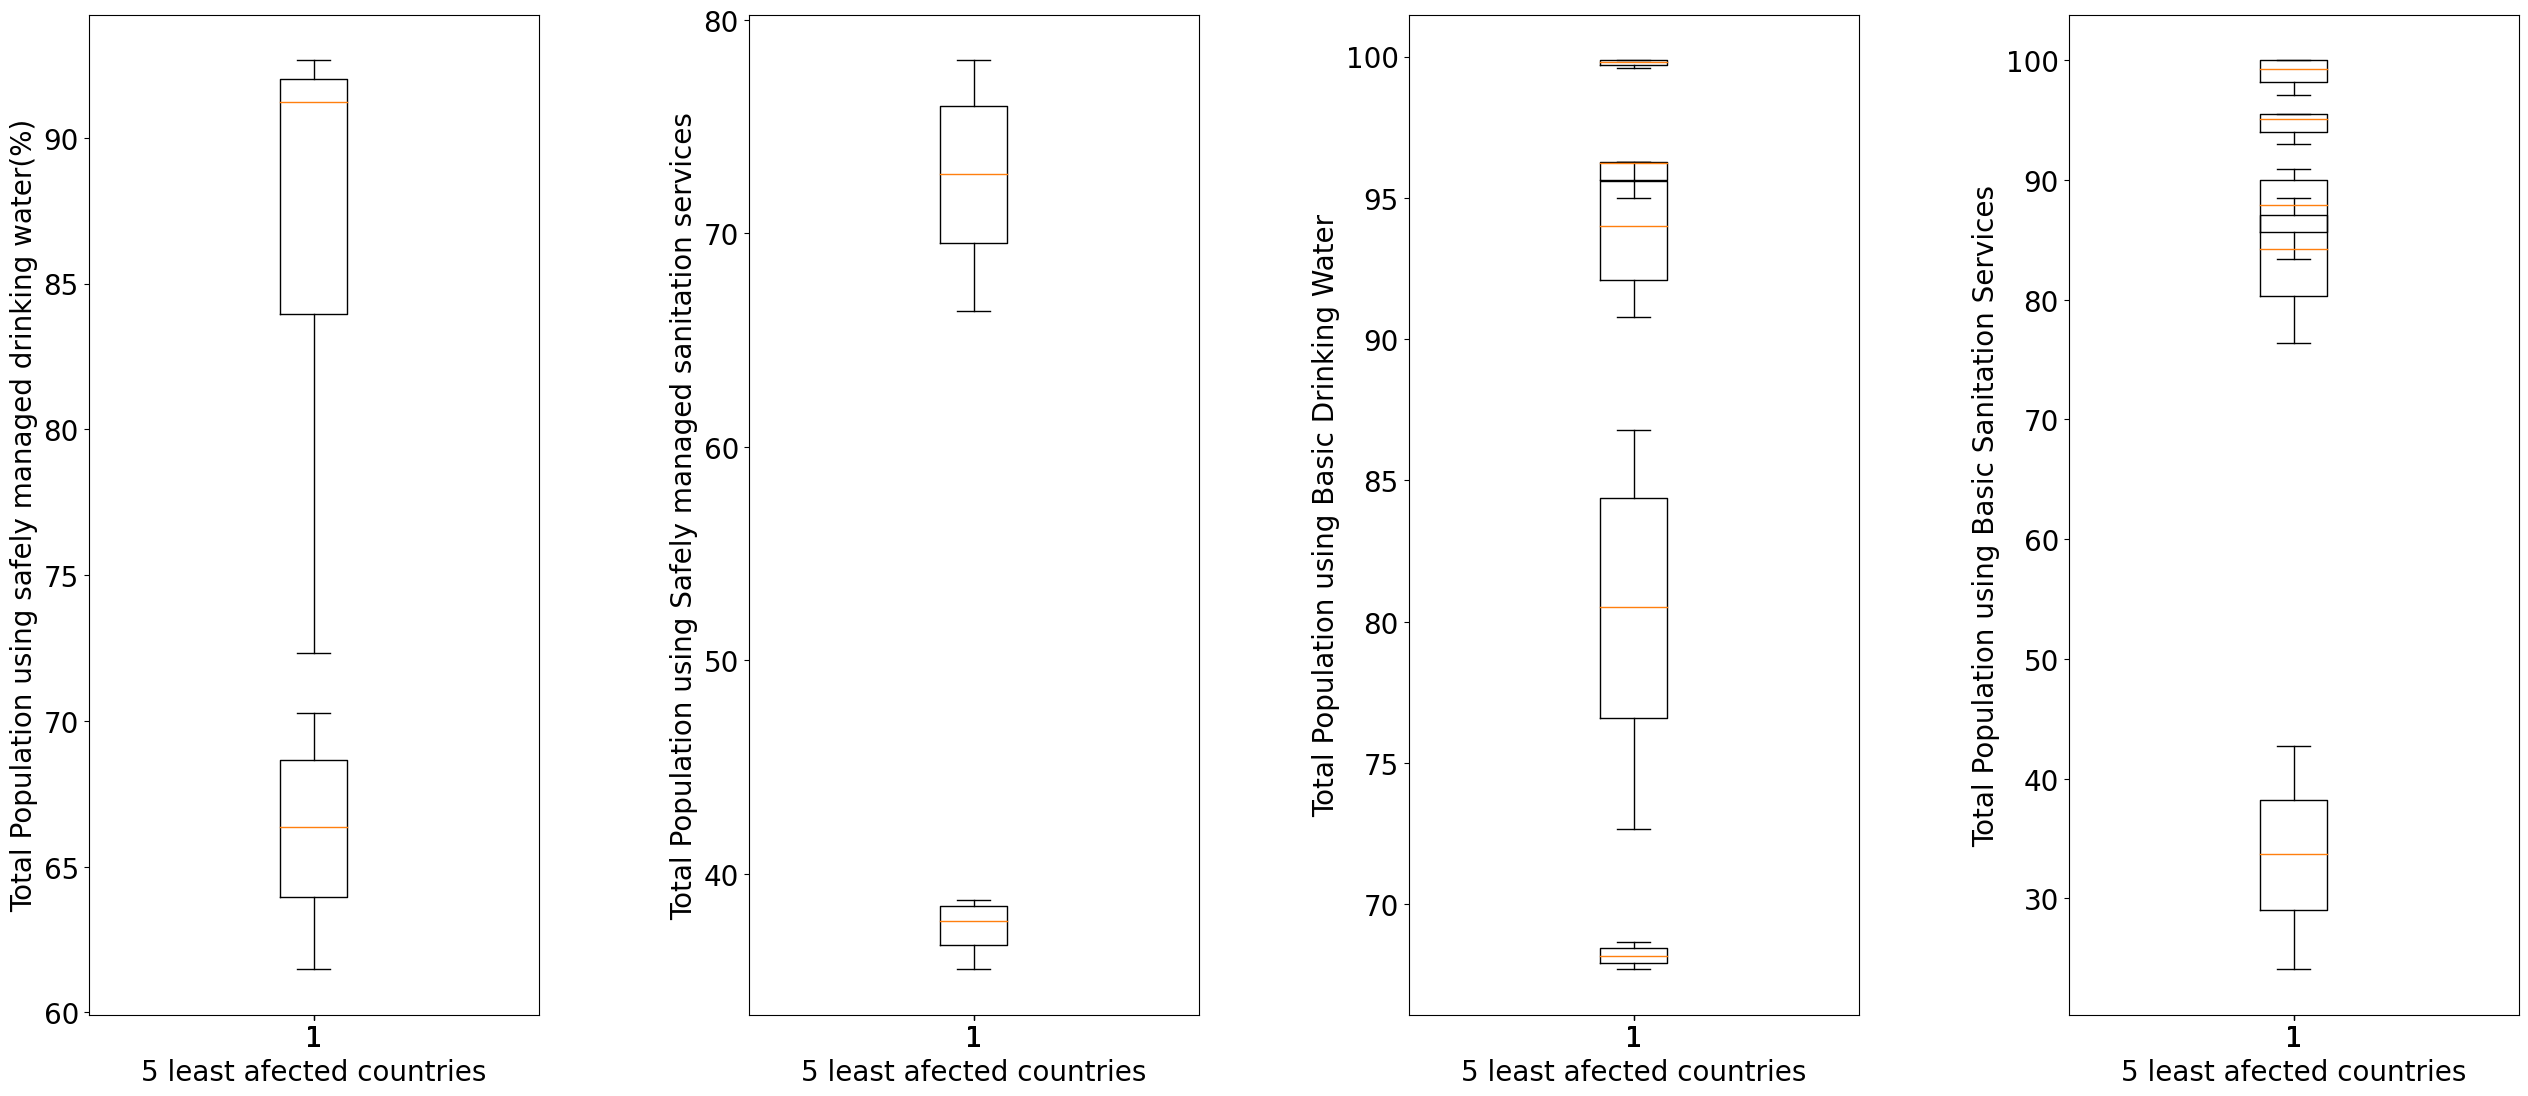

In [34]:
# total dispersion on on graph paper 
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_axes([0,0,0.15,1])
ax2 = fig.add_axes([0.22,0,0.15,1])
ax3 = fig.add_axes([0.44,0,0.15,1])
ax4 = fig.add_axes([0.66,0,0.15,1])

ax1.set_xlabel('5 least afected countries')
ax1.set_ylabel('Total Population using safely managed drinking water(%)')
ax2.set_xlabel('5 least afected countries')
ax2.set_ylabel('Total Population using Safely managed sanitation services')
ax3.set_xlabel('5 least afected countries')
ax3.set_ylabel('Total Population using Basic Drinking Water')
ax4.set_xlabel('5 least afected countries')
ax4.set_ylabel('Total Population using Basic Sanitation Services')

fig.tight_layout()
for names,group in leastImpactedDataframe.groupby(by='COUNTRY'):
    ax1.boxplot(group['%OF_TOT_POP_USING_SM_DRKWTR'])
    ax2.boxplot(group['%OF_TOT_POP_USING_SM_SANITAION_SERVICE'])
    ax3.boxplot(group['%OF_TOT_POP_USING_BASIC_DR_WTR'])
    ax4.boxplot(group['%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES'])

C:\Users\SAIFULLAH KHAN\AppData\Local\Temp\ipykernel_15592\2478068706.py:18: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



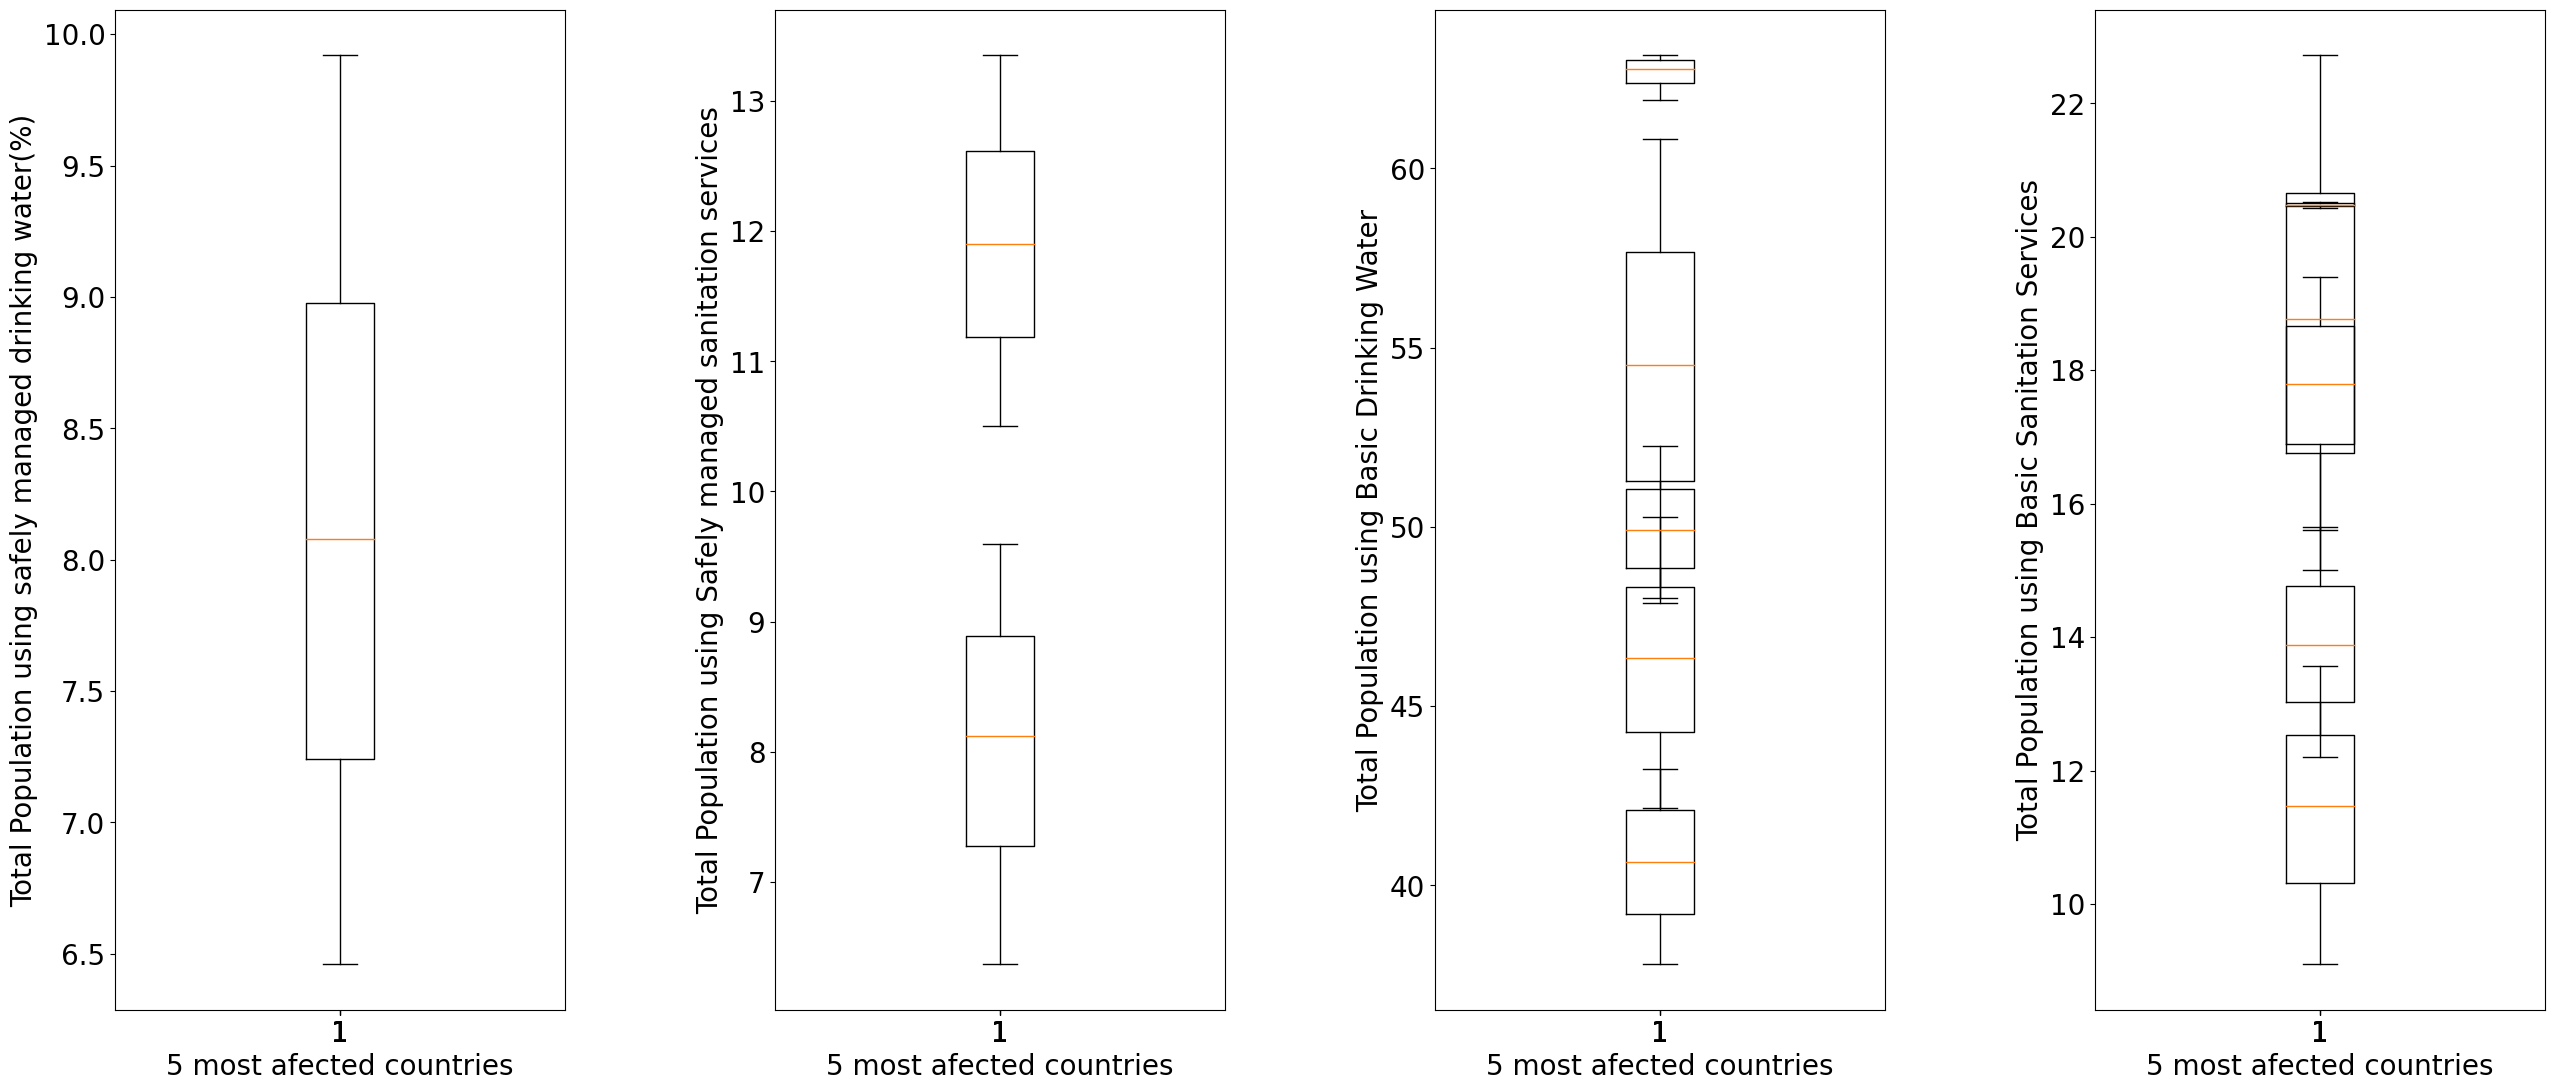

In [35]:
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_axes([0,0,0.15,1])
ax2 = fig.add_axes([0.22,0,0.15,1])
ax3 = fig.add_axes([0.44,0,0.15,1])
ax4 = fig.add_axes([0.66,0,0.15,1])

ax1.set_xlabel('5 most afected countries')
ax1.set_ylabel('Total Population using safely managed drinking water(%)')
ax2.set_xlabel('5 most afected countries')
ax2.set_ylabel('Total Population using Safely managed sanitation services')
ax3.set_xlabel('5 most afected countries')
ax3.set_ylabel('Total Population using Basic Drinking Water')
ax4.set_xlabel('5 most afected countries')
ax4.set_ylabel('Total Population using Basic Sanitation Services')

fig.tight_layout()
for names,group in mostImpactedDataframe.groupby(by='COUNTRY'):
    ax1.boxplot(group['%OF_TOT_POP_USING_SM_DRKWTR'])
    ax2.boxplot(group['%OF_TOT_POP_USING_SM_SANITAION_SERVICE'])
    ax3.boxplot(group['%OF_TOT_POP_USING_BASIC_DR_WTR'])
    ax4.boxplot(group['%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES'])

In [36]:
avgLeastAffectedDf = leastImpactedDataframe.drop(['YEAR','COUNTRY_CODE','GEOMETRY'],axis=1).groupby(by='COUNTRY').mean()

In [37]:
def giveAvg(val):
    return val.mean()

In [38]:
res = pd.DataFrame(data = [giveAvg(avgLeastAffectedDf['%OF_TOT_POP_USING_SM_DRKWTR']),giveAvg(avgLeastAffectedDf['%OF_TOT_POP_USING_SM_SANITAION_SERVICE']),giveAvg(avgLeastAffectedDf['%OF_TOT_POP_USING_BASIC_DR_WTR']),giveAvg(avgLeastAffectedDf['%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES'])],index=['AvgPerOfSafelyManagedWater','AvgPerOfSafelyManagedSanitation','AvgPerOfBasicWater','AvgPerOfBasicManagedSanitation'])

<StemContainer object of 3 artists>

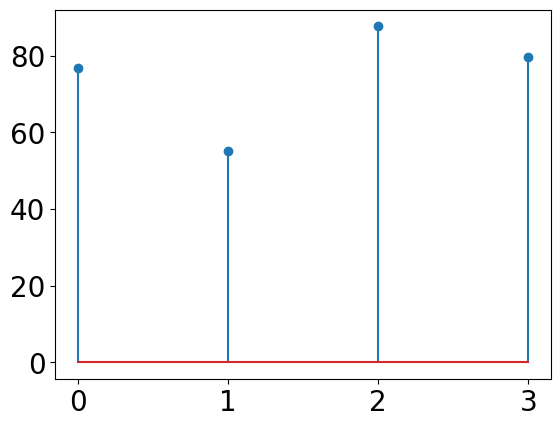

In [39]:
plt.stem(res)

In [40]:
avgMostAffectedDf = mostImpactedDataframe.drop(['YEAR','COUNTRY_CODE','GEOMETRY'],axis=1).groupby(by='COUNTRY').mean()

In [41]:
res = pd.DataFrame(data = [giveAvg(avgMostAffectedDf['%OF_TOT_POP_USING_SM_DRKWTR']),giveAvg(avgMostAffectedDf['%OF_TOT_POP_USING_SM_SANITAION_SERVICE']),giveAvg(avgMostAffectedDf['%OF_TOT_POP_USING_BASIC_DR_WTR']),giveAvg(avgMostAffectedDf['%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES'])],index=['AvgPerOfSafelyManagedWater','AvgPerOfSafelyManagedSanitation','AvgPerOfBasicWater','AvgPerOfBasicManagedSanitation'])

<StemContainer object of 3 artists>

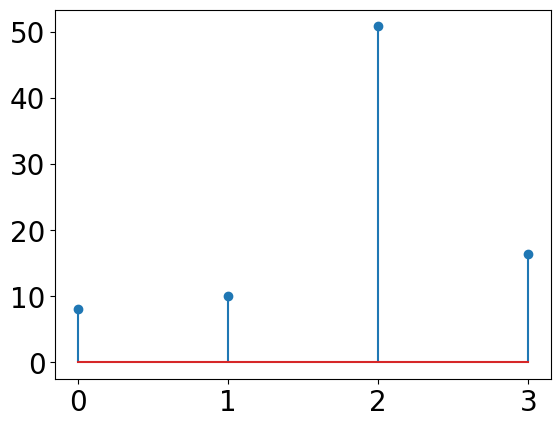

In [42]:
plt.stem(res)

<h2> RESULT: </h2>
<h3> We can clearly see the result: </h3>

<table>
  <tr>
    <th>Facilities</th>
    <th>LEAST MALARIAL IMPACT</th>
    <th>MOST MALARIAL IMPACT</th>
  </tr>
  <tr>
    <td>AvgPerOfSafelyManagedWater</td>
    <td>78</td>
    <td>8</td>
  </tr>
  <tr>
    <td>AvgPerOfSafelyManagedSanitation</td>
    <td>58</td>
    <td>10</td>
  </tr>
    <tr>
    <td>AvgPerOfBasicWater</td>
    <td>90</td>
    <td>52</td>
  </tr>
    <tr>
    <td>AvgPerOfBasicManagedSanitation</td>
    <td>82</td>
    <td>16</td>
  </tr>
</table>
<h4 style="color: red"> Less Malaria patients are found in countries where water supply and good sanitation is provided </h4>

<h3 style="color:green">YEAR_WISE DATA ANALYSIS</h3>

In [43]:
df

,COUNTRY,YEAR,COUNTRY_CODE,MLR_PER_1K_POP,MLR_CASE_REPORTED,%CHILD<5AGE_USING_ITB_NETS,%CHILD<5AGE_RECIEVING_AMD,%OF_PRG_WOMEN_RECEIVING_IPT,%OF_TOT_POP_USING_SM_DRKWTR,%OF_RURAL_POP_USING_SM_DRKWTR,...,%OF_TOT_POP_USING_BASIC_SANITATION_SERVICES,%OF_RURAL_POP_USING_BASIC_SANITATION_SERVICES,%OF_URBAN_POP_USING_BASIC_SANITATION_SERVICES,LATITUDE,LONGTITUDE,GEOMETRY,TotalPopulation,RuralPopulation,UrbanPopulation,%PopSufferingMalaria
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626),2.600000e+06,9.009000e+05,1.699100e+06,0.001
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887),5.348371e+06,2.271988e+06,3.076383e+06,28.672
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834),0.000000e+00,0.000000e+00,0.000000e+00,0.000
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866),3.786408e+05,1.592942e+05,2.193466e+05,0.103
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593),8.782453e+04,6.762489e+04,2.019964e+04,50.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782),6.310485e+06,3.713090e+06,2.597396e+06,27.820
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499),NaN,NaN,NaN,0.000
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275),3.464732e+07,2.660914e+07,8.038178e+06,33.676
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332),3.439949e+07,1.961459e+07,1.478490e+07,16.005


<h4> Yearwise trend in case of global malarial impact </h4>

In [44]:
gp = df.groupby(by='YEAR')
result = gp.sum()['MLR_CASE_REPORTED']

Text(0, 0.5, 'Malaria case ->')

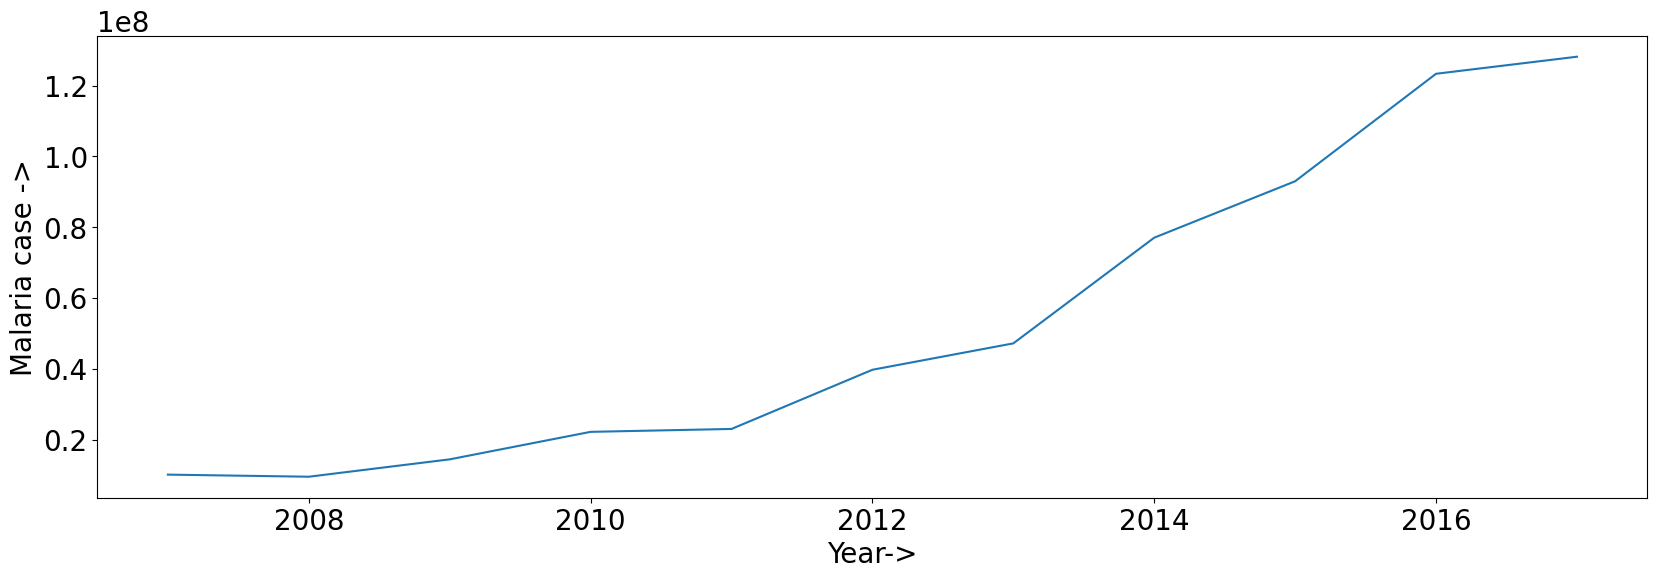

In [45]:
fig = plt.figure(figsize=(20,6))
plt.plot(result)
plt.xlabel('Year->')
plt.ylabel('Malaria case ->')

In [46]:
# rp = df.drop(["GEOMETRY","COUNTRY_CODE"],axis=1).groupby(by=['COUNTRY','YEAR']).agg({'%PopSufferingMalaria':'mean'}).unstack()
# rp

In [49]:
rp = pd.pivot_table(data=df,index='COUNTRY',columns='YEAR',aggfunc={'%PopSufferingMalaria':'mean'})

In [51]:
rp

%PopSufferingMalaria                                  \
YEAR                                     2007    2008    2009    2010    2011   
COUNTRY                                                                         
Algeria                                 0.001   0.000   0.000   0.000   0.000   
Angola                                 28.672  24.119  20.435  18.552  17.599   
Benin                                   0.000   0.000  41.796   0.000  37.011   
Botswana                                0.103   0.193   0.210   0.169   0.051   
Burkina Faso                           50.380  53.339  55.203  55.124  53.956   
Burundi                                22.292  22.277  22.065  21.020  18.415   
Cabo Verde                              0.015   0.028   0.051   0.037   0.005   
Cameroon                                0.000   0.000   0.000   0.000  26.510   
Central African Republic                0.000   0.000   0.000   0.000   0.000   
Chad                                   21.071  21.510   0.000  22.594  21.048   
Comoros                                 6.065   5.921   5.781   5.298   3.518   
Congo, Dem. Rep.                       48.193  47.143  45.218  42.831  39.959   
Congo, Rep.                            28.183  24.916  22.632   0.000  22.438   
Cote d'Ivoire                           0.000  51.008  49.448  46.927  44.211   
Djibouti                                0.384   0.374   0.433   0.160   0.342   
Egypt, Arab Rep.                        0.000   0.000   0.000   0.000   0.000   
Equatorial Guinea                      39.815  37.824  35.129  33.999  34.240   
Eritrea                                 1.254   0.678   0.886   2.633   2.386   
Eswatini                                0.029   0.020   0.036   0.090   0.183   
Ethiopia                               12.169   9.066  12.335  12.840  11.613   
Gabon                                  11.066  11.887  14.595  17.782   0.000   
Gambia, The                             0.000  30.684  29.798  28.927  25.726   
Ghana                                  32.233  33.372  35.139  36.415  37.952   
Guinea                                 34.369  37.017  39.814  41.466  42.690   
Guinea-Bissau                           7.281   8.902  11.380  13.437  14.055   
Kenya                                   0.000   6.768   0.000   6.771   6.786   
Lesotho                                 0.000   0.000   0.000   0.000   0.000   
Liberia                                38.318  38.333  36.881  34.577  33.041   
Libya                                   0.000   0.000   0.000   0.000   0.000   
Madagascar                              2.278   2.347   4.292   4.224   3.655   
Malawi                                  0.000   0.000   0.000   0.000  36.278   
Mali                                    0.000   0.000   0.000  38.360  40.473   
Mauritania                              0.000   6.114   3.164   3.883   4.758   
Mauritius                               0.000   0.000   0.000   0.000   0.000   
Morocco                                 0.000   0.000   0.000   0.000   0.000   
Mozambique                             39.945  39.979  40.230  39.841  38.992   
Namibia                                 1.297   0.746   0.336   0.154   0.213   
Niger                                  38.668  40.910  41.910  42.564  42.788   
Nigeria                                 0.000  42.466  41.659  39.890   0.000   
Rwanda                                  9.064   7.203  15.816  12.631   3.929   
Sao Tome and Principe                   1.456   3.657   3.515   1.519   4.575   
Senegal                                10.191   8.642   5.712   5.928   4.991   
Seychelles                              0.000   0.000   0.000   0.000   0.000   
Sierra Leone                            0.000  41.385  44.215  45.874  45.365   
Somalia                                10.056   6.310   3.844   2.959   2.435   
South Africa                            0.129   0.157   0.120   0.157   0.190   
South Sudan                             0.000  26.714   

<Axes: xlabel='None-YEAR', ylabel='COUNTRY'>

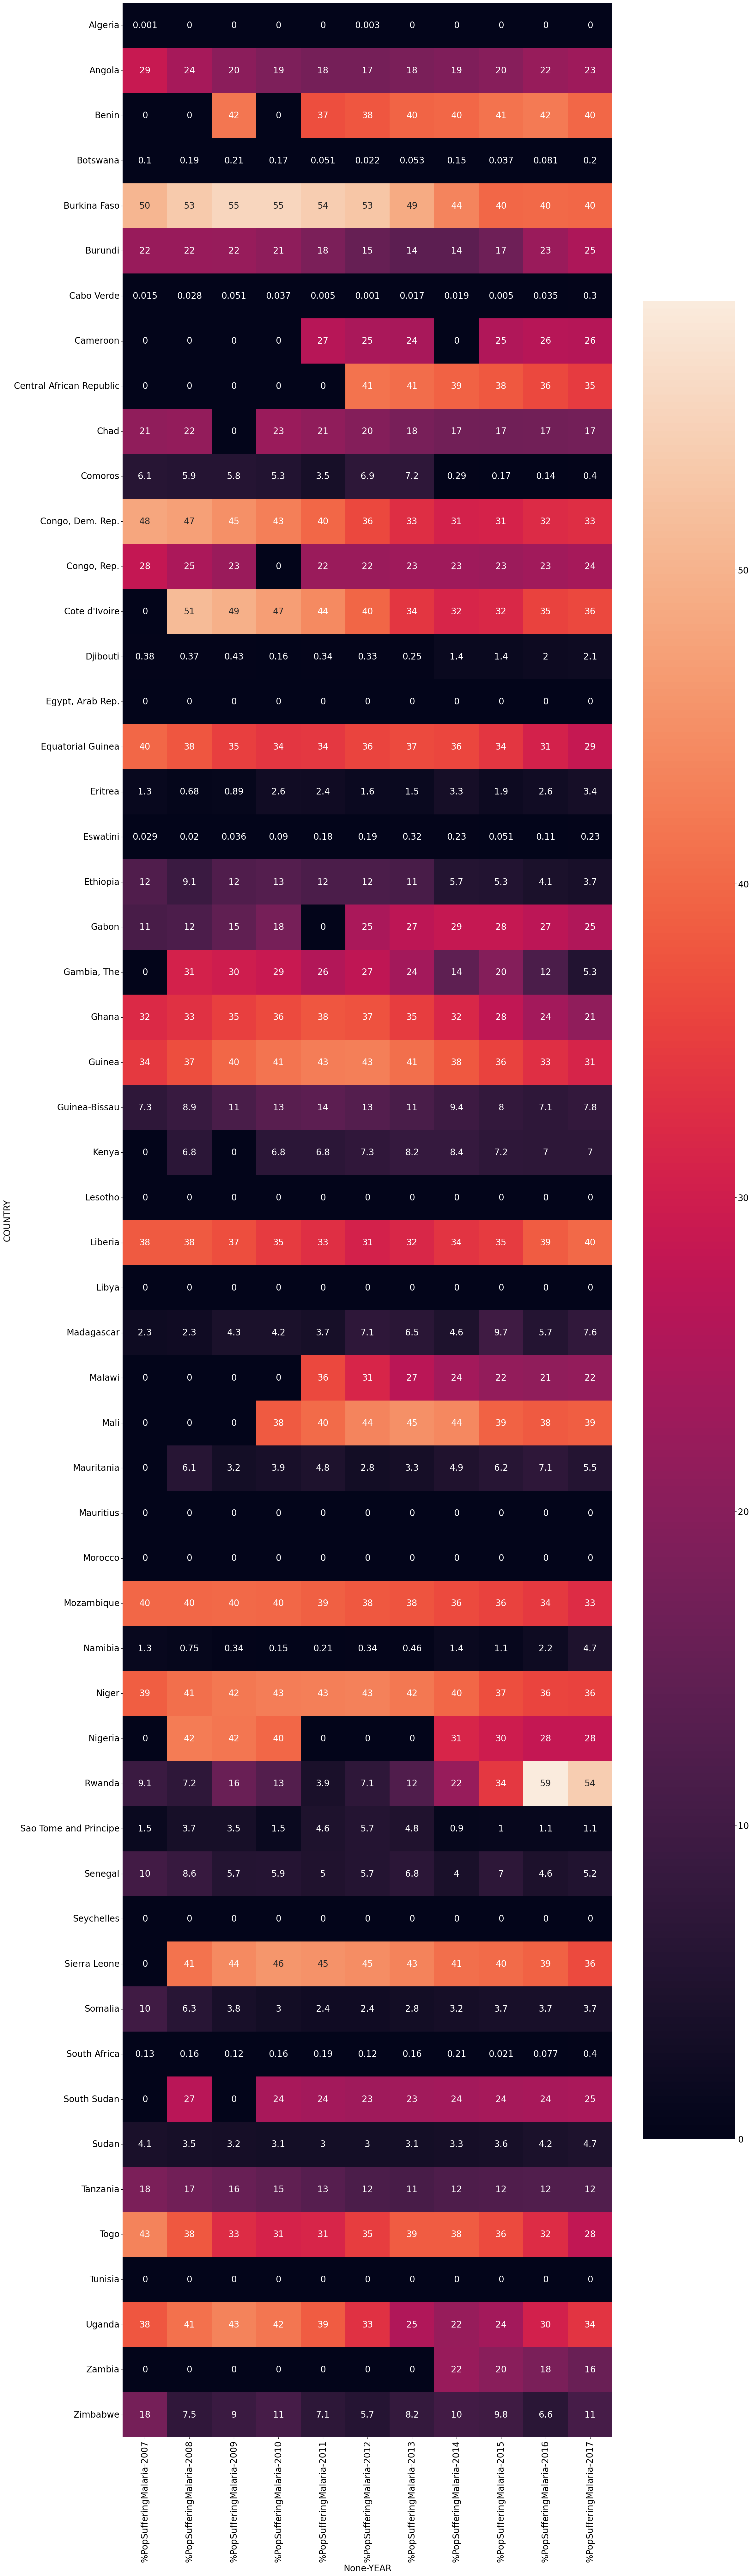

In [55]:
fig = plt.figure(figsize=(25,100))
sns.heatmap(rp,annot=True)

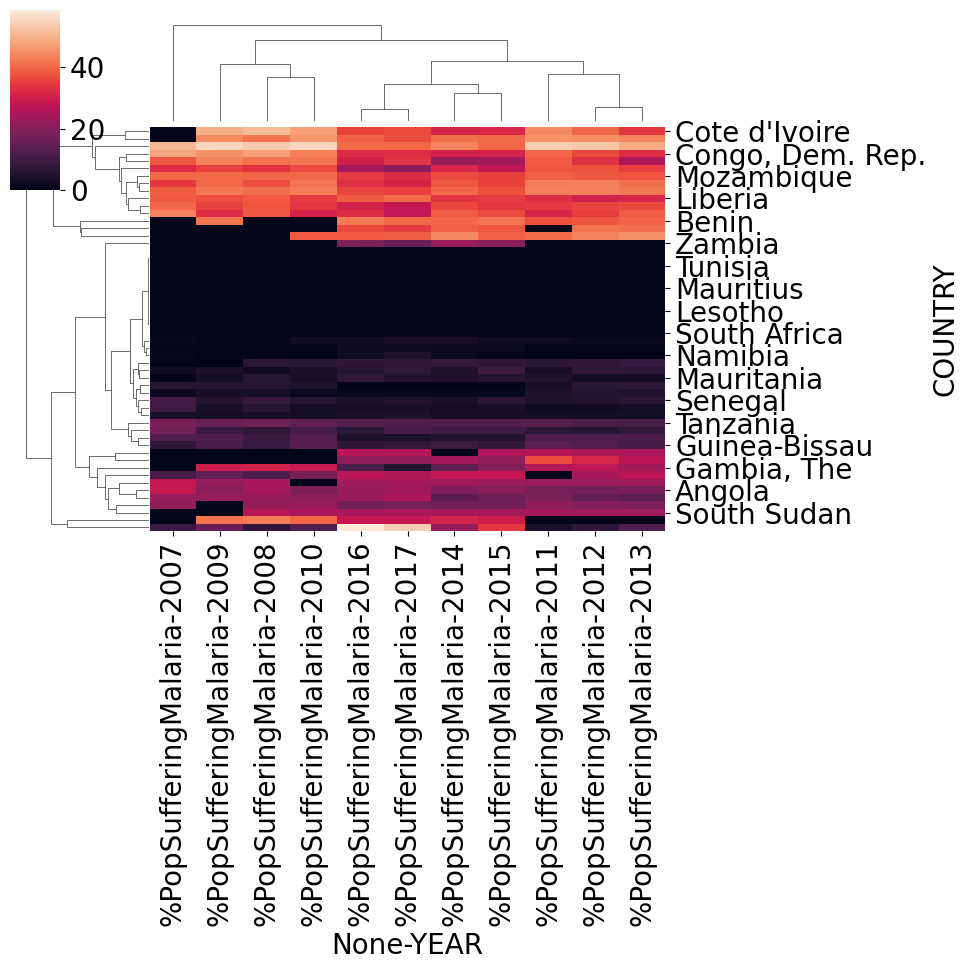

In [60]:
sns.clustermap(rp)

<h4 style="color: red">From Above Graphs it is clear. The malaria cases keeps on increasing almost exponantially and <strong style="color:black">Rwanda</strong> was worsted affected in year <strong style="color:black">2016</strong>.</h4>